In [1]:
import pandas as pd

import geopandas as gpd
df = pd.read_csv('/Users/ryanng/Desktop/nyc_pluto_22v3_1_csv/pluto_22v3_1.csv')

df_selected = df[['borough','lotarea', 'bldgarea','zonedist1','latitude','longitude','cd']]
df_selected.dropna(subset=['bldgarea'], inplace=True)
df_selected.dropna(subset=['zonedist1'], inplace=True)
def get_first_letter(string):
    return string[0]
df_selected['column_name'] = df_selected['zonedist1'].apply(get_first_letter)

/var/folders/mq/85gqchqx0zgg03bk5c8gqjpr0000gn/T/ipykernel_41898/3797988339.py:4: DtypeWarning: Columns (21,22,24,26,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/ryanng/Desktop/nyc_pluto_22v3_1_csv/pluto_22v3_1.csv')
/var/folders/mq/85gqchqx0zgg03bk5c8gqjpr0000gn/T/ipykernel_41898/3797988339.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.dropna(subset=['bldgarea'], inplace=True)
/var/folders/mq/85gqchqx0zgg03bk5c8gqjpr0000gn/T/ipykernel_41898/3797988339.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.dropna(subset=['zonedist1']

In [2]:
gdf = gpd.GeoDataFrame(df_selected, geometry=gpd.points_from_xy(df_selected.longitude, df_selected.latitude))
gdf['density']=gdf['bldgarea']/gdf['lotarea']
gdf=gdf[gdf['density']<=6]
gdf

,borough,lotarea,bldgarea,zonedist1,latitude,longitude,cd,column_name,geometry,density
0,BK,2017.0,1210.0,R6B,40.687196,-73.946599,303.0,R,POINT (-73.94660 40.68720),0.599901
1,BK,1833.0,1551.0,R5,40.614595,-73.992299,311.0,R,POINT (-73.99230 40.61460),0.846154
2,BK,2424.0,2352.0,R5,40.612501,-73.991842,311.0,R,POINT (-73.99184 40.61250),0.970297
3,BK,1400.0,2124.0,R6B,40.681827,-73.941303,303.0,R,POINT (-73.94130 40.68183),1.517143
4,BK,1779.0,3132.0,R6B,40.632047,-74.021282,310.0,R,POINT (-74.02128 40.63205),1.760540
...,...,...,...,...,...,...,...,...,...,...
858613,BK,833.0,0.0,R6,40.693757,-73.923496,304.0,R,POINT (-73.92350 40.69376),0.000000
858614,BK,1600.0,2200.0,R6B,40.687395,-73.975113,302.0,R,POINT (-73.97511 40.68740),1.375000
858615,BK,59066.0,0.0,M1-1,40.651631,-73.906935,316.0,M,POINT (-73.90693 40.65163),0.000000
858616,QN,976261.0,0.0,M1-1,40.708049,-73.773339,412.0,M,POINT (-73.77334 40.70805),0.000000


In [3]:
# reading in nta shape data
url = 'Community Districts.geojson'
nta_shape = gpd.read_file(url)

nta_shape

,boro_cd,shape_area,shape_leng,geometry
0,308,45603787.0874,38232.8866494,"MULTIPOLYGON (((-73.95829 40.67983, -73.95596 ..."
1,101,41686645.7055,69054.4472325,"MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ..."
2,414,195576601.166,210918.175118,"MULTIPOLYGON (((-73.90972 40.56529, -73.90973 ..."
3,204,55522139.9705,31358.4504633,"MULTIPOLYGON (((-73.90269 40.84458, -73.90271 ..."
4,501,377232535.649,153751.224394,"MULTIPOLYGON (((-74.15946 40.64145, -74.15975 ..."
...,...,...,...,...
66,409,107378543.969,50771.8331321,"MULTIPOLYGON (((-73.81710 40.70403, -73.81697 ..."
67,309,45314980.3908,29932.0840386,"MULTIPOLYGON (((-73.92872 40.66450, -73.92905 ..."
68,355,26144172.7074,23961.3953181,"MULTIPOLYGON (((-73.96257 40.67162, -73.96254 ..."
69,502,591527955.292,142728.995772,"MULTIPOLYGON (((-74.07347 40.57839, -74.07345 ..."


In [4]:
district_data=gdf.groupby('cd').sum()
district_data['density']=district_data['bldgarea']/district_data['lotarea']
district_data=district_data[['density']]
district_data=district_data.reset_index()
district_data['cd'] = district_data['cd'].astype(int)
district_data

,cd,density
0,101,1.038430
1,102,2.776815
2,103,2.217674
3,104,2.013116
4,105,2.510606
...,...,...
65,484,0.125987
66,501,0.307893
67,502,0.192519
68,503,0.207110


In [5]:
nta_shape = nta_shape.rename(columns={'boro_cd': 'cd'})
nta_shape['cd'] = nta_shape['cd'].astype(int)
merged_df1 = pd.merge(nta_shape, district_data, on='cd', how='left')

In [6]:
merged_df1=merged_df1.dropna(subset=['density'])
merged_df1

,cd,shape_area,shape_leng,geometry,density
0,308,45603787.0874,38232.8866494,"MULTIPOLYGON (((-73.95829 40.67983, -73.95596 ...",1.750770
1,101,41686645.7055,69054.4472325,"MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ...",1.038430
2,414,195576601.166,210918.175118,"MULTIPOLYGON (((-73.90972 40.56529, -73.90973 ...",0.298721
3,204,55522139.9705,31358.4504633,"MULTIPOLYGON (((-73.90269 40.84458, -73.90271 ...",1.842669
4,501,377232535.649,153751.224394,"MULTIPOLYGON (((-74.15946 40.64145, -74.15975 ...",0.307893
...,...,...,...,...,...
66,409,107378543.969,50771.8331321,"MULTIPOLYGON (((-73.81710 40.70403, -73.81697 ...",0.816492
67,309,45314980.3908,29932.0840386,"MULTIPOLYGON (((-73.92872 40.66450, -73.92905 ...",1.708570
68,355,26144172.7074,23961.3953181,"MULTIPOLYGON (((-73.96257 40.67162, -73.96254 ...",0.040250
69,502,591527955.292,142728.995772,"MULTIPOLYGON (((-74.07347 40.57839, -74.07345 ...",0.192519


<Axes: >

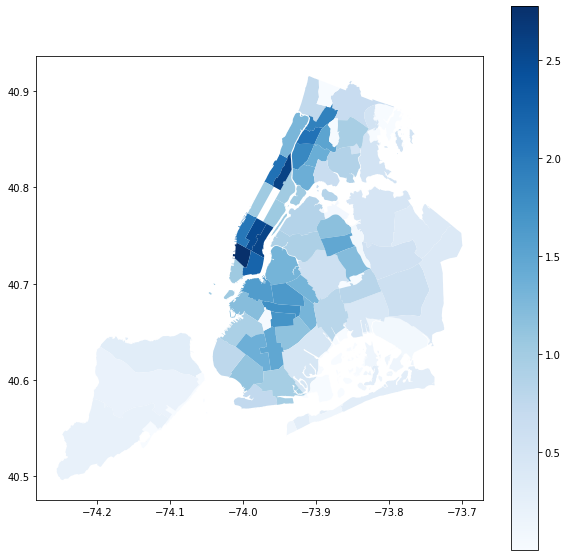

In [10]:
merged_df1.plot(column='density',cmap='Blues',legend=True,figsize=(10, 10))
plt.savefig('bar_chart_district_data.jpg')

In [11]:
def convert_cd(code):
    boro_codes = {
        1: 'MN',
        2: 'BX',
        3: 'BK',
        4: 'QN',
        5: 'SI'
    }
    boro_code = boro_codes[int(str(code)[0])]
    return boro_code + str(code)[1:]

district_data['district'] = district_data['cd'].apply(lambda x: convert_cd(x))

In [12]:
district_data

,cd,density,district
0,101,1.038430,MN01
1,102,2.776815,MN02
2,103,2.217674,MN03
3,104,2.013116,MN04
4,105,2.510606,MN05
...,...,...,...
65,484,0.125987,QN84
66,501,0.307893,SI01
67,502,0.192519,SI02
68,503,0.207110,SI03


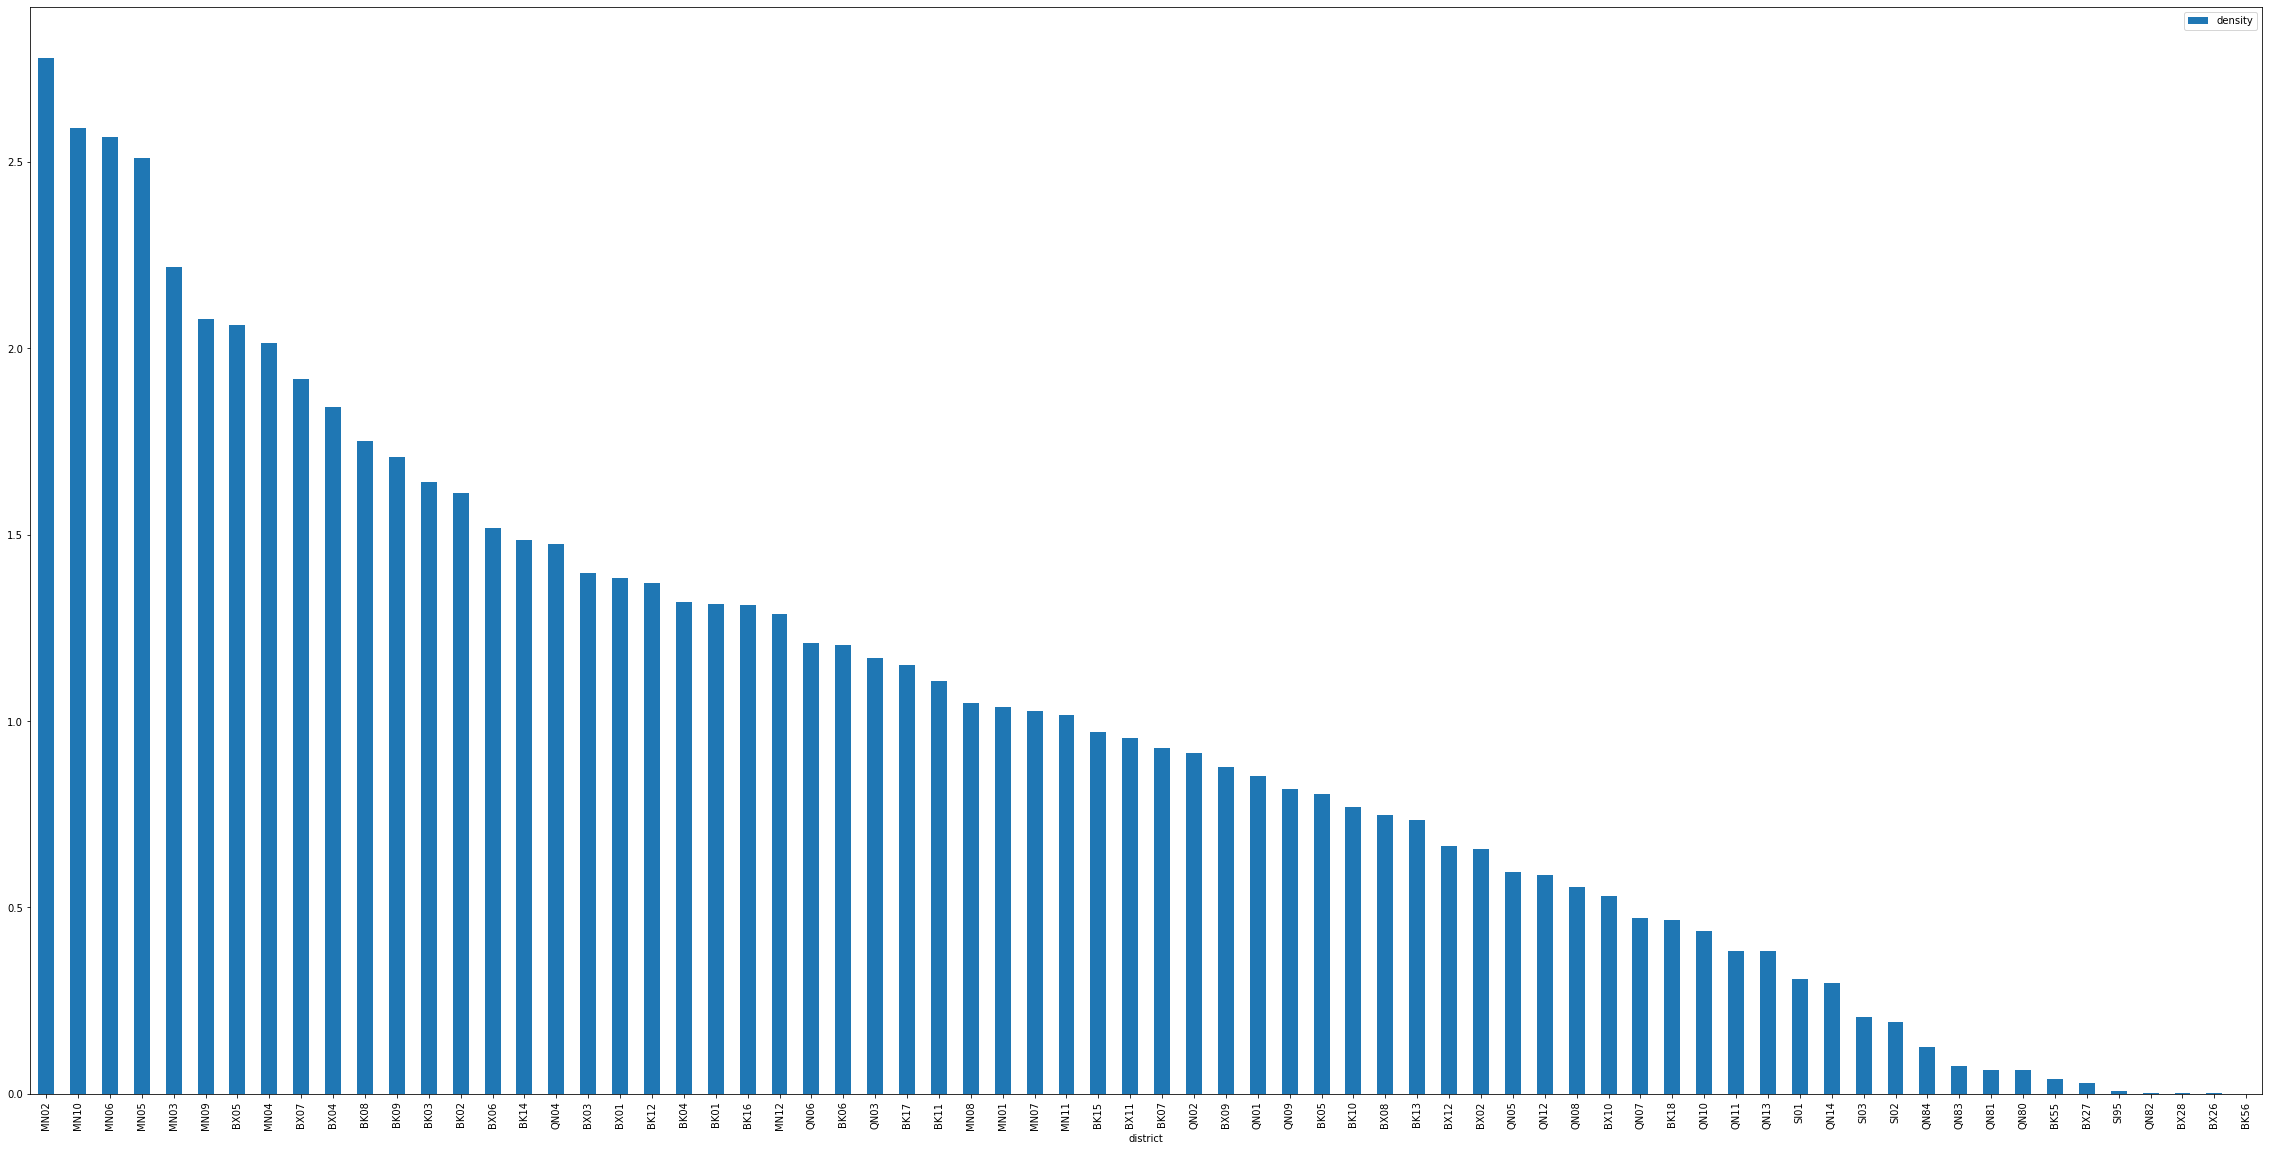

In [23]:
import matplotlib.pyplot as plt
district_bar = district_data.sort_values('density',ascending=False)

district_bar.plot.bar(x='district', y='density', figsize=(40, 20))
plt.savefig('bar_chart_district_data.jpg')
# 显示图形
plt.show()
